# DNS Features Statistics

In [5]:
%matplotlib inline

In [ ]:
import csv

import config as c
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[1832   14]
 [  28 1815]]
Normalized confusion matrix
[[0.99241603 0.00758397]
 [0.01519262 0.98480738]]


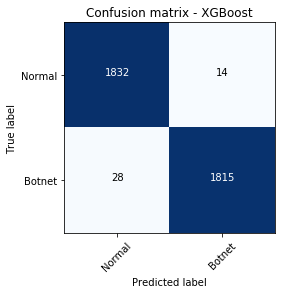

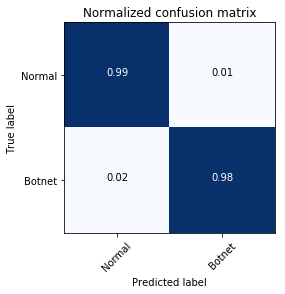

In [3]:
# Print Confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

tn=1832
fp=14
fn=28
tp=1815

cm = np.array([[tn, fp],[fn, tp]])
class_names = ["Normal", "Botnet"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix - XGBoost')

plt.savefig("./confusion_matrix.png")
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.savefig("./confusion_matrix_normalized.png")

plt.show()

In [2]:
def get_features_name():
    with open(c.model_folder + "features.csv", 'r') as csvfile:
        csvreader = csv.reader(csvfile, lineterminator='\n', delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
        features_name = csvreader.next()[1:-1]
        return features_name

In [7]:
import shap
import pickle
import sys
import os
sys.path.insert(0, os.environ['HOME'] + '/BotnetDetectionThesis/machine_learning')
import Get_normalize_data
from xgboost import XGBClassifier

# load JS visualization code to notebook
shap.initjs()

#name = "XGBoost"
#model = pickle.load(open(c.model_folder + name + '.model', "rb"))
only_https = False
X_train, X_test, y_train, y_test = Get_normalize_data.get_all_data(c.model_folder, only_https)

#features_name = get_features_name()
#X = pd.DataFrame(X_train, columns=features_name)

X = X_train

model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

model.fit(X, y_train) 


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [8]:
print shap_values

[[-2.9563274e-02  1.0894014e+00  3.1354392e-01 ...  1.3597357e-01
  -2.1584800e-02 -9.4702864e-01]
 [ 1.6314390e-01  3.7177086e+00  8.1579566e-01 ... -1.6806450e-01
  -2.4901409e-01 -9.3034077e-01]
 [ 9.5083021e-02 -5.4317933e-02 -2.3681560e+00 ... -3.9463043e-01
  -4.8142532e-01  5.2928740e-01]
 ...
 [-2.2462308e-03  1.3215872e+00  3.0419877e-01 ... -3.1958470e-01
  -3.0880271e-02  7.4418455e-01]
 [-2.1241523e-02 -8.4492576e-01 -8.0420935e-01 ...  1.6549943e-01
  -3.5620680e-01 -1.1176336e+00]
 [-1.6275438e-02  2.3829760e-01  6.3668257e-01 ...  2.0368847e-01
   1.5130053e-01  8.7836808e-01]]


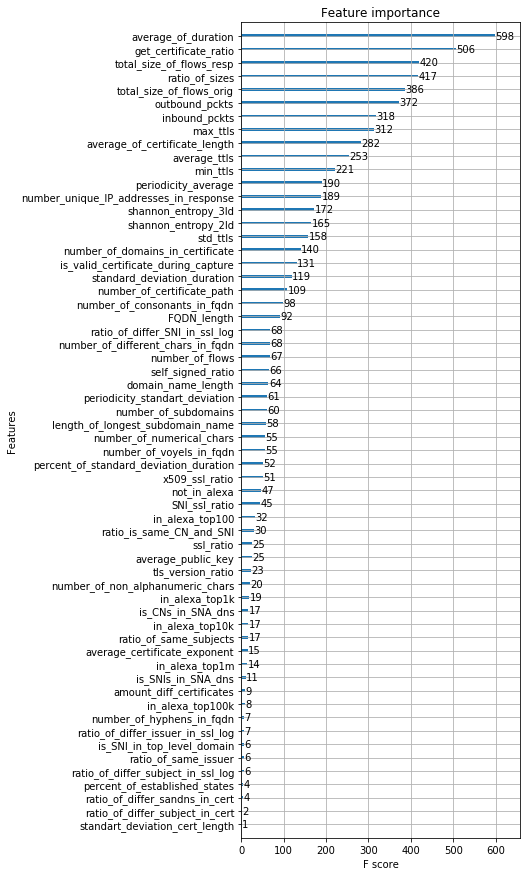

In [41]:
import xgboost as xgb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax = xgb.plot_importance(model, ax=ax)

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

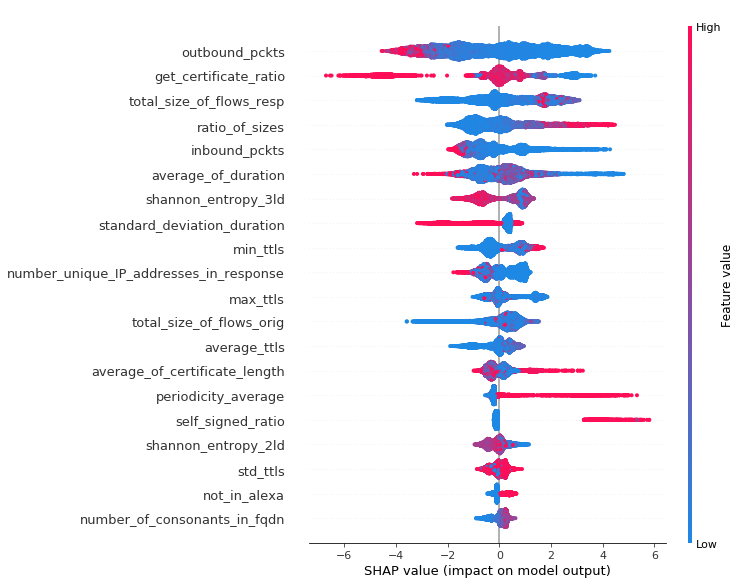

In [29]:
# visualize the first prediction's explanation
#shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

shap.summary_plot(shap_values, X)

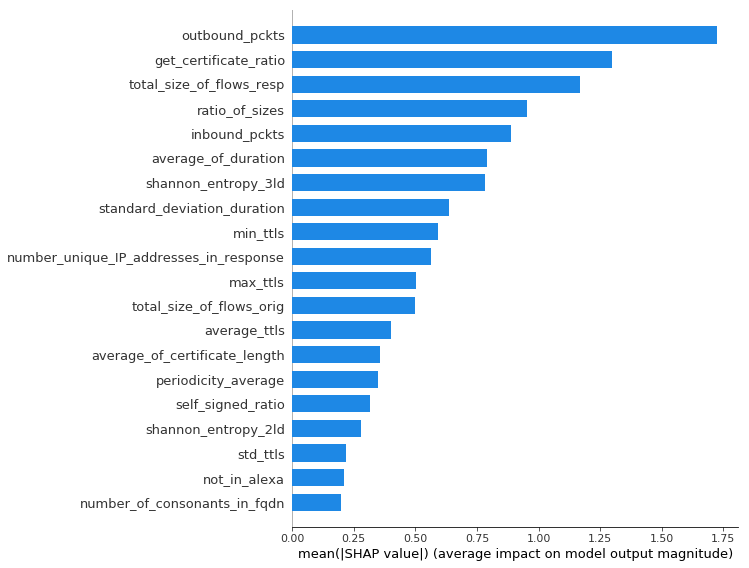

In [30]:
shap.summary_plot(shap_values, X, plot_type="bar")

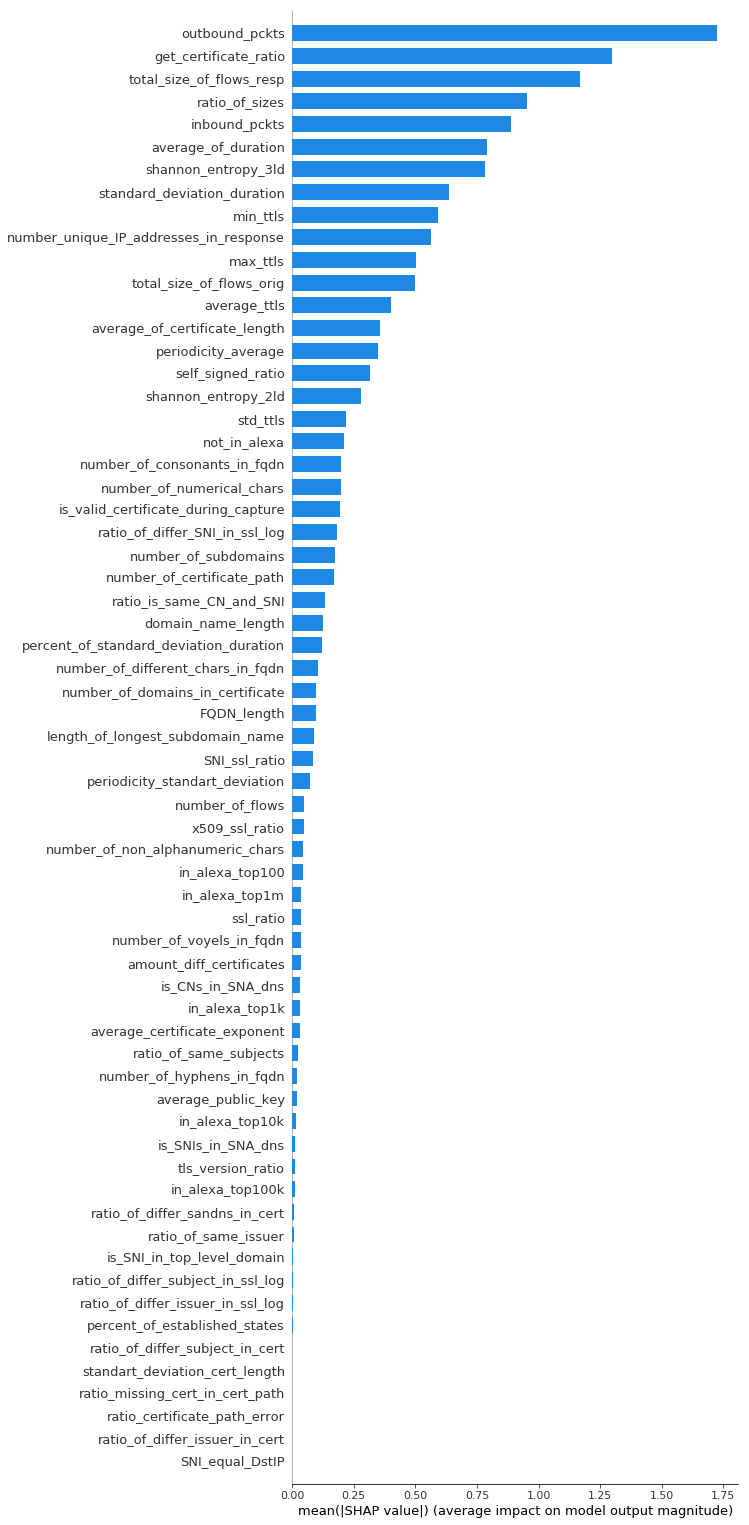

In [10]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=64)

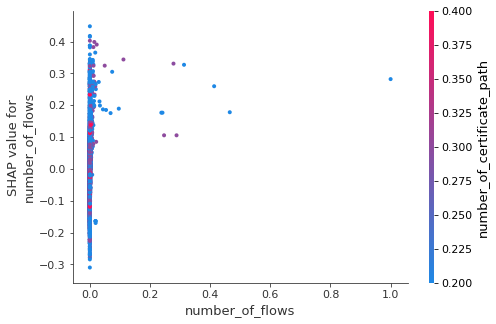

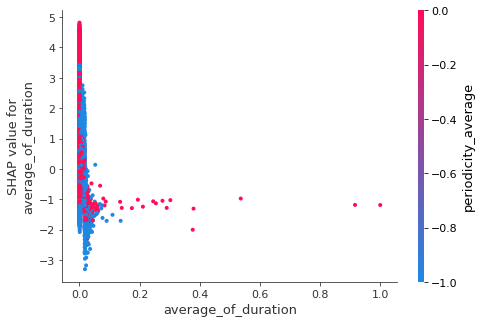

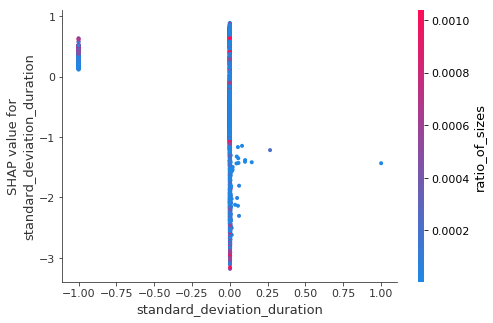

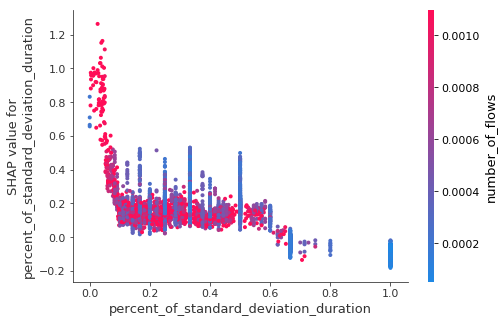

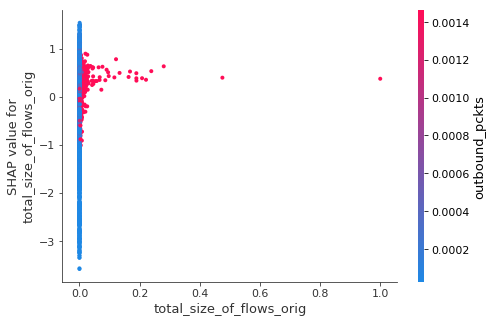

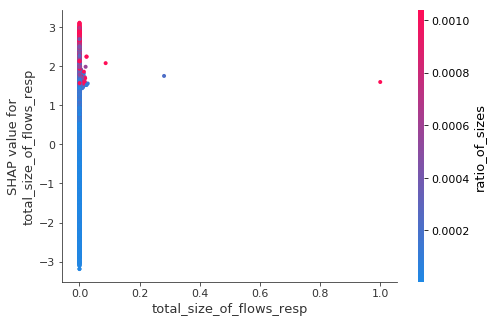

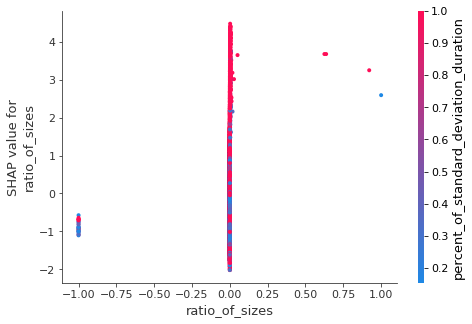

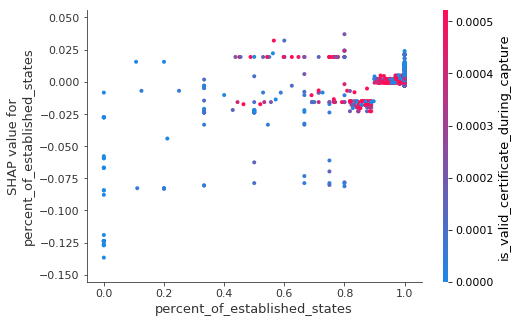

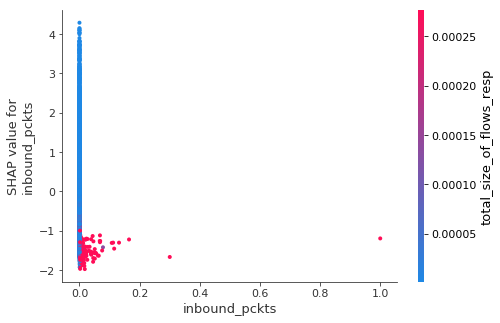

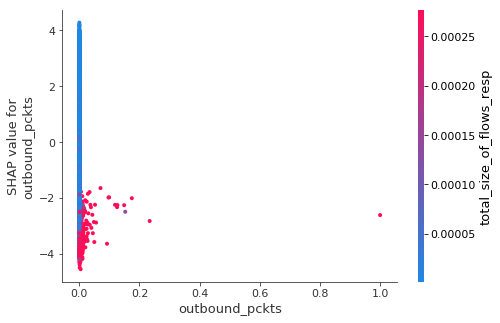

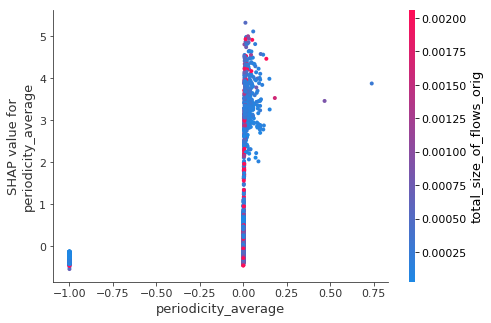

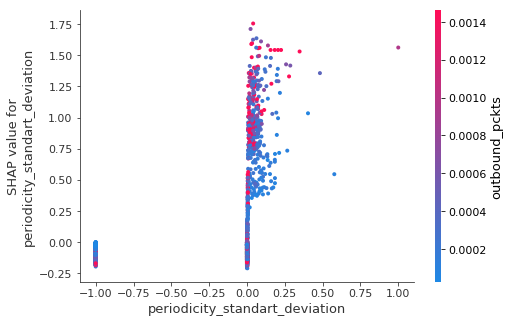

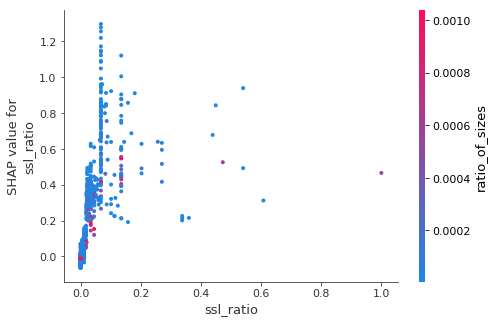

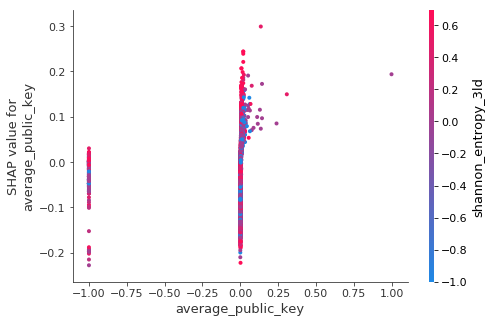

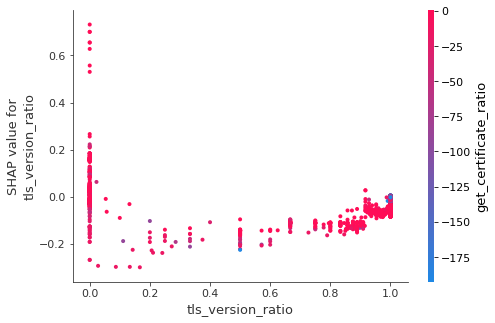

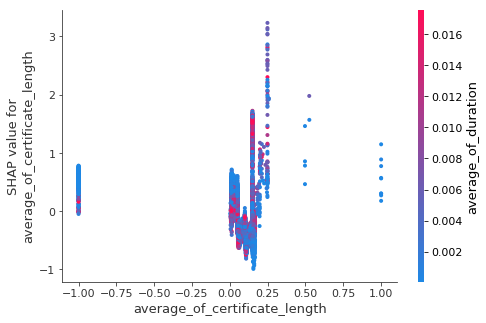

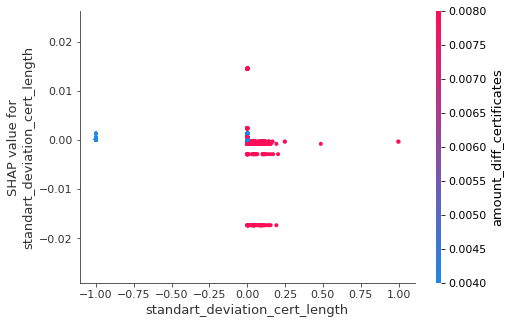

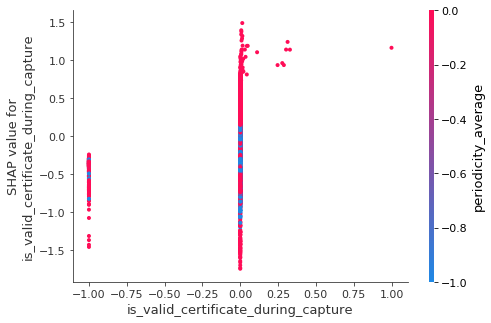

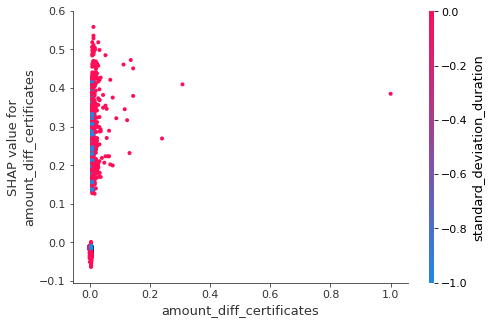

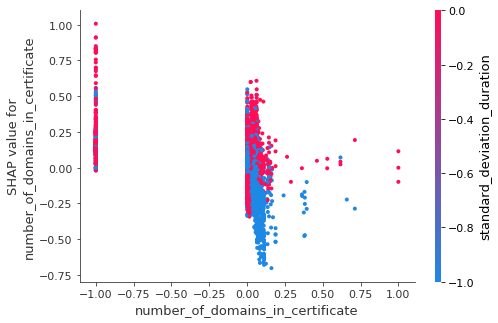

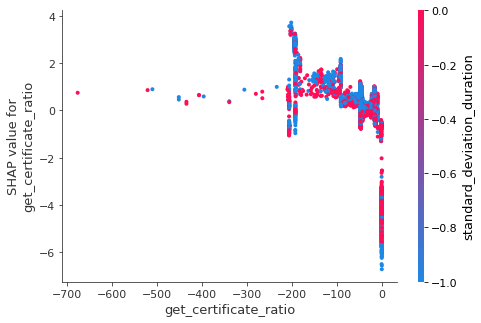

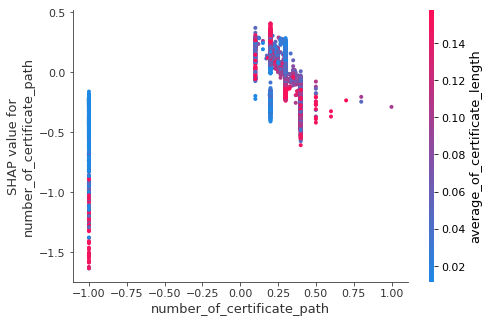

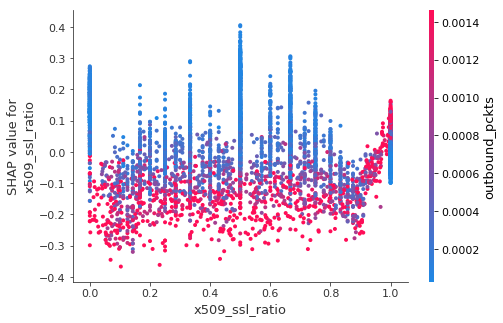

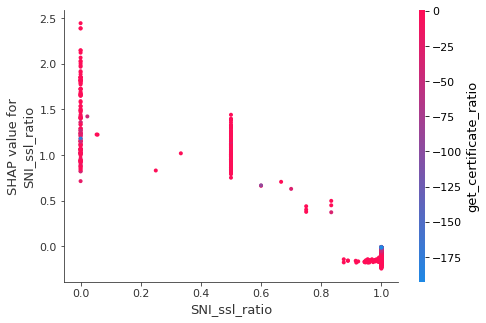

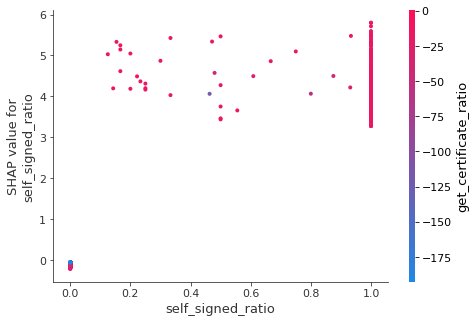

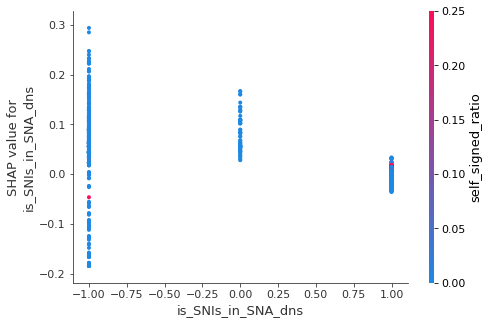

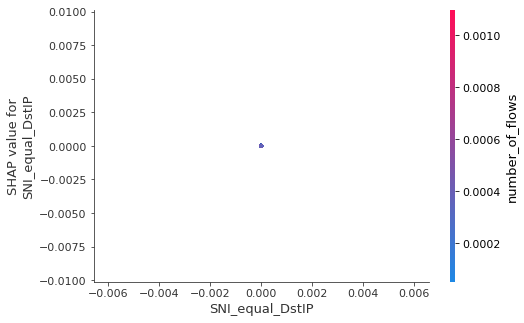

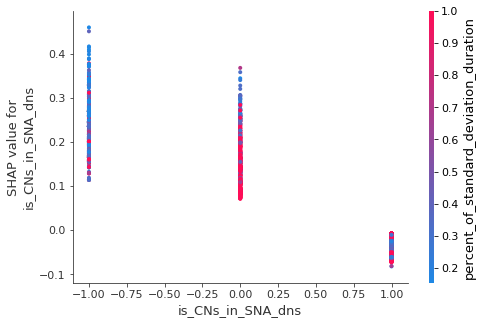

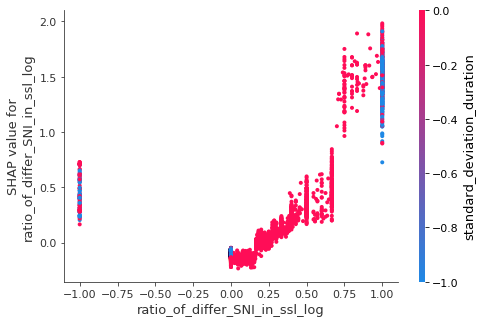

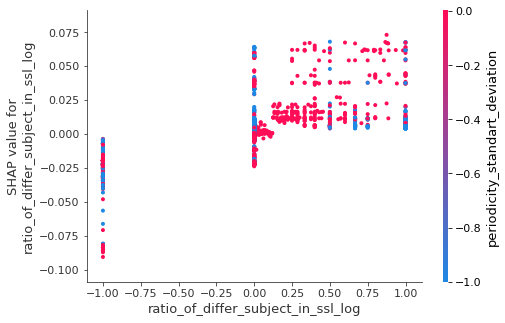

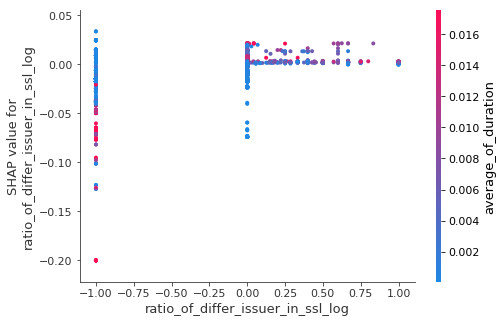

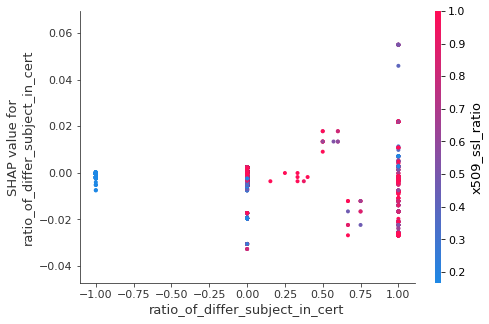

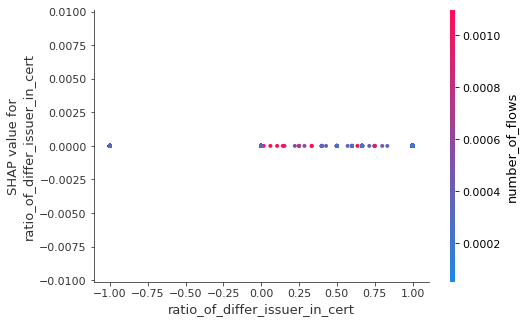

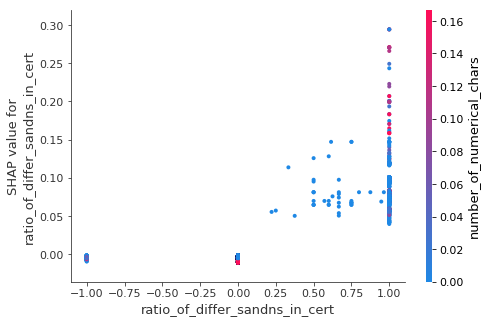

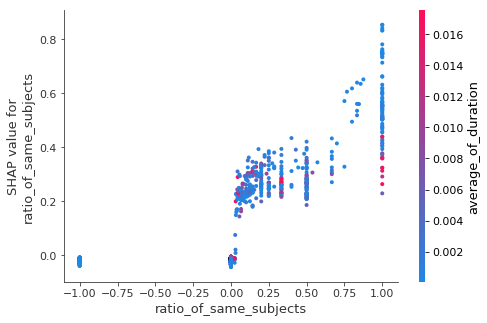

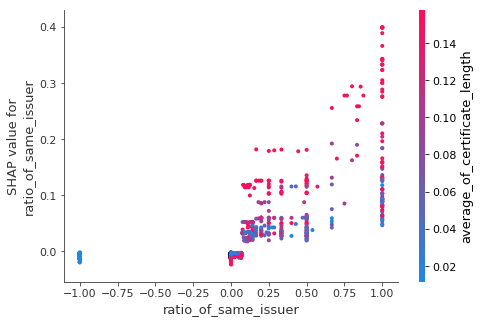

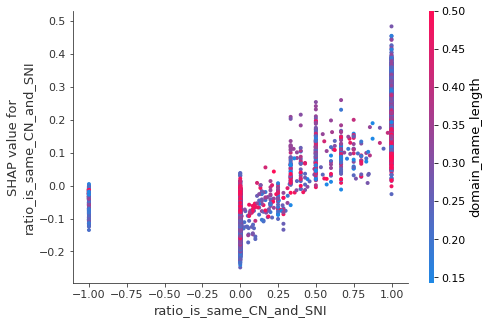

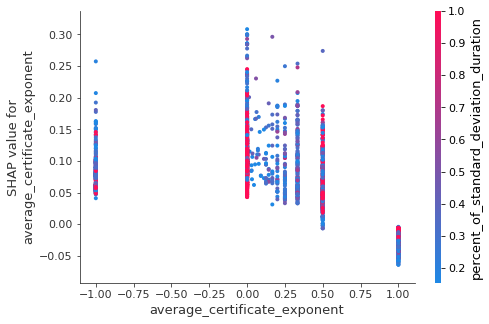

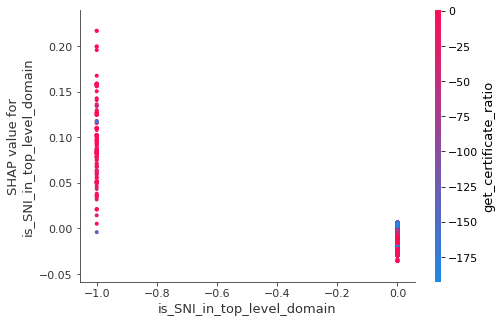

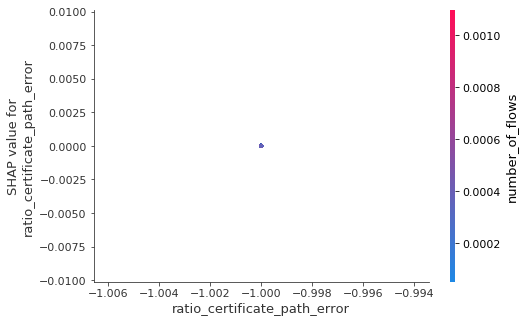

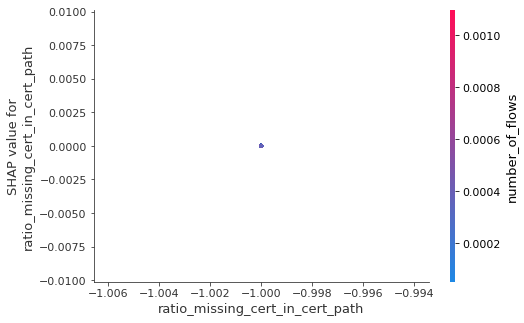

In [8]:
# HTTPS

# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
for f in features_name[0:41]:
    shap.dependence_plot(f, shap_values, X)
#shap.dependence_plot("periodicity_average", shap_values, X)

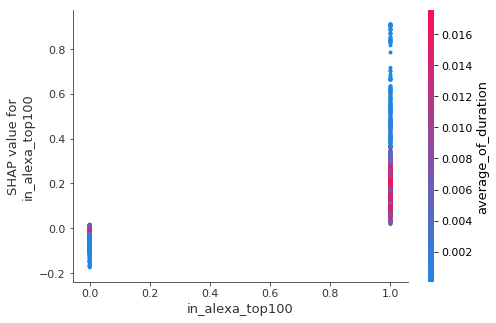

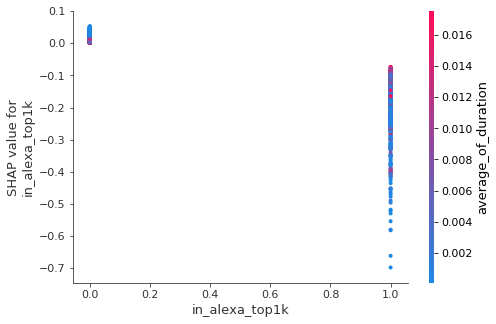

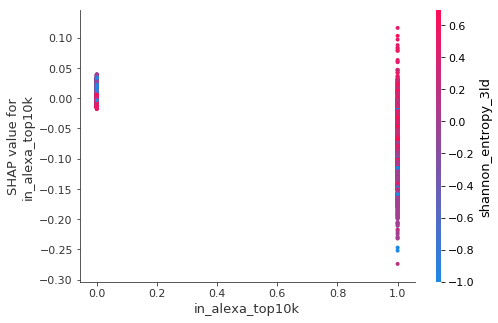

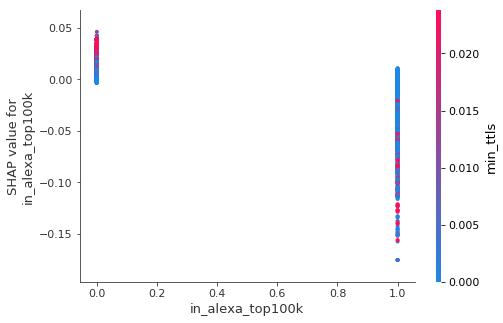

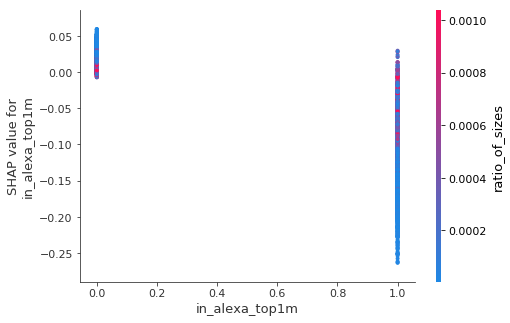

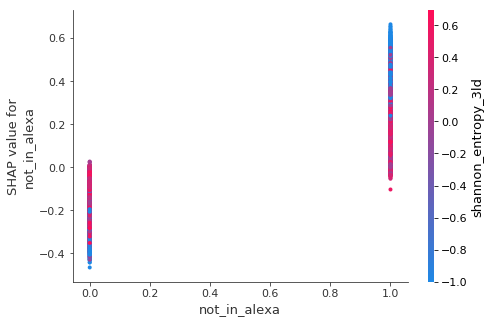

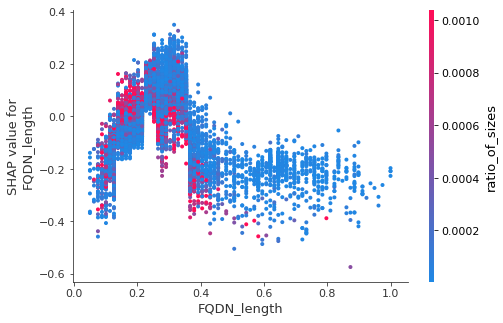

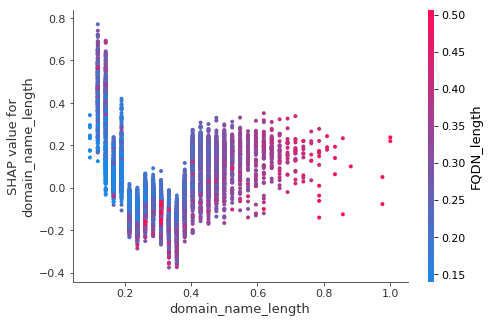

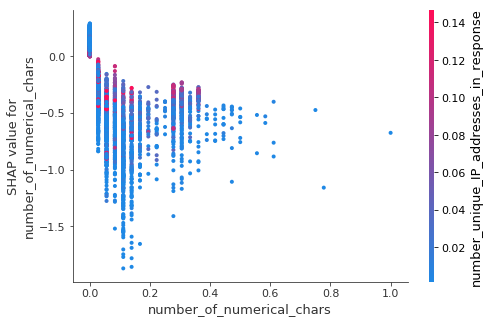

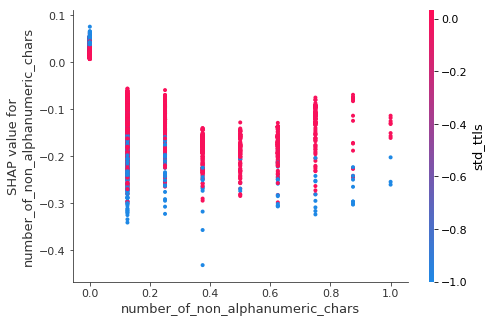

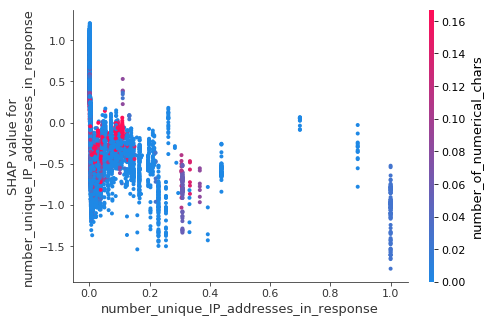

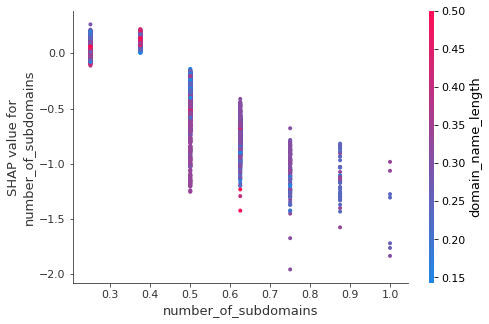

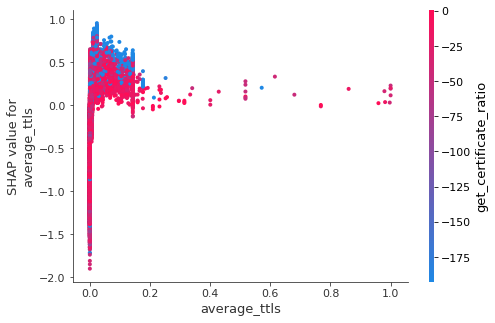

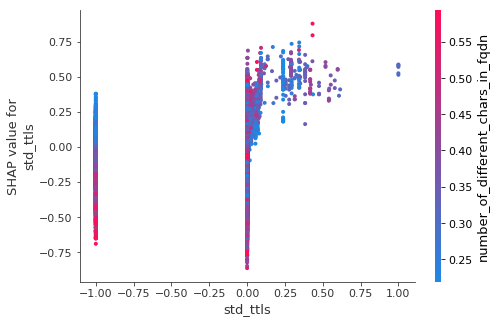

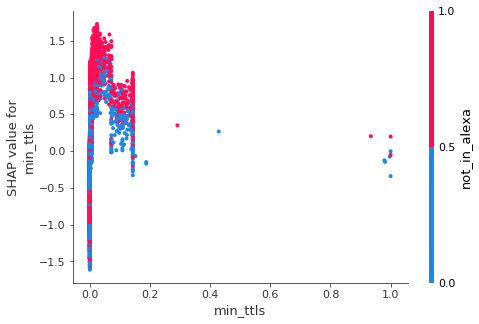

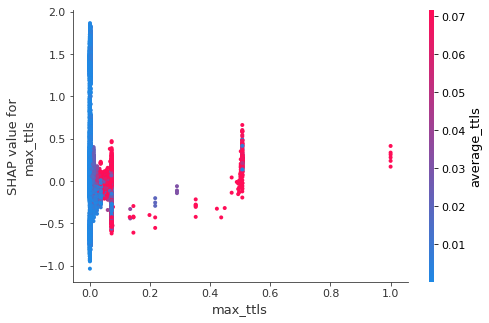

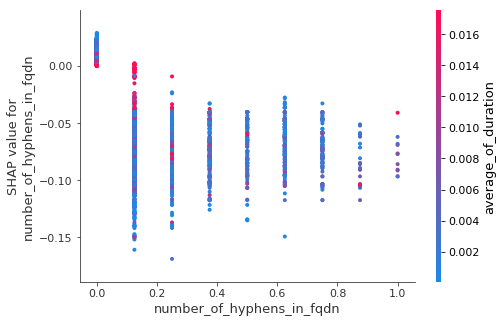

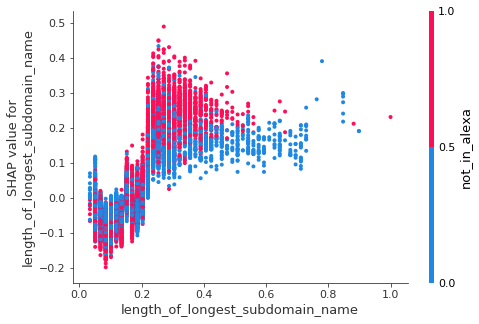

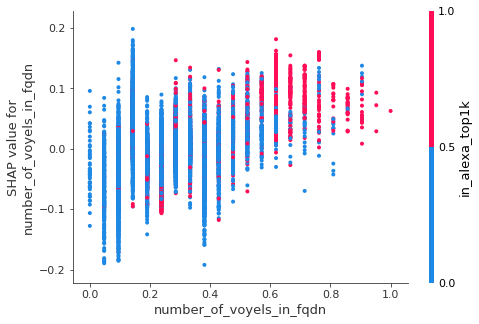

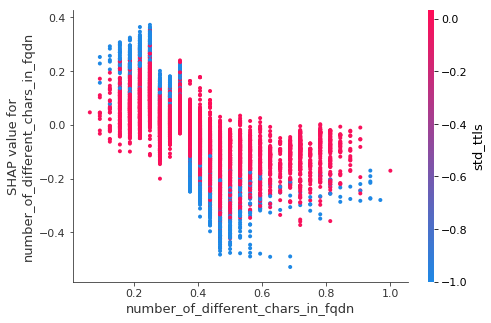

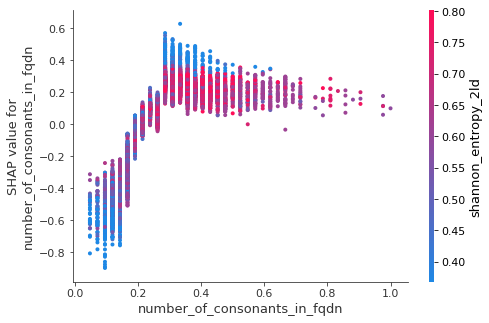

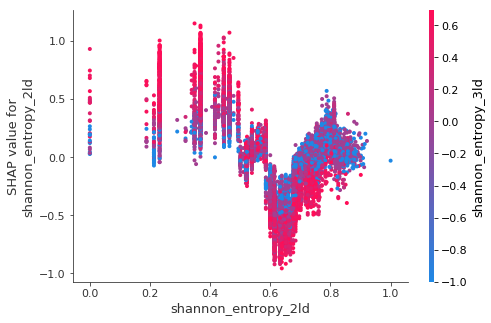

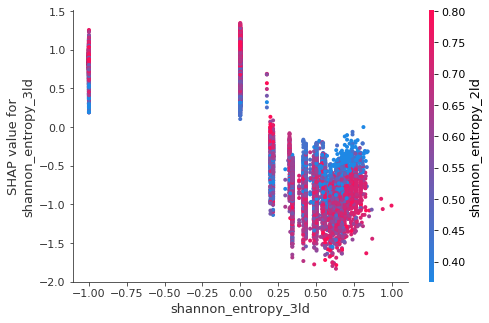

In [33]:
# DNS
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
for f in features_name[41:]:
    shap.dependence_plot(f, shap_values, X)

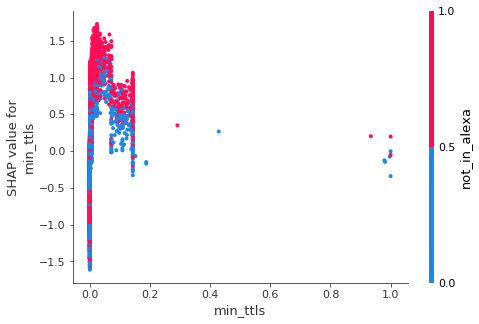

In [34]:
shap.dependence_plot("min_ttls", shap_values, X)

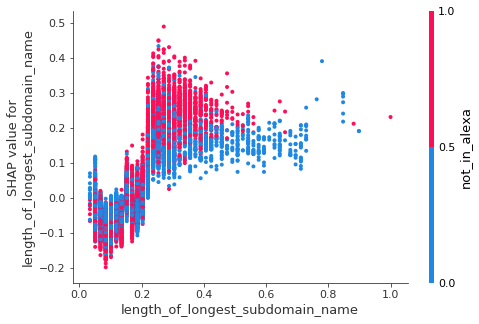

In [35]:
shap.dependence_plot("length_of_longest_subdomain_name", shap_values, X)

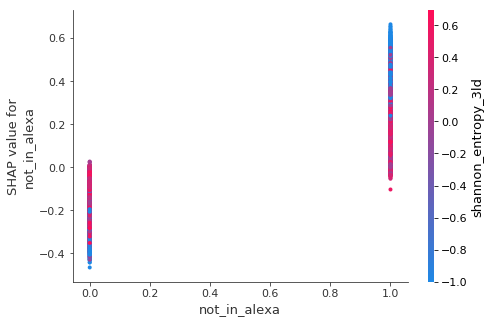

In [36]:
shap.dependence_plot("not_in_alexa", shap_values, X)

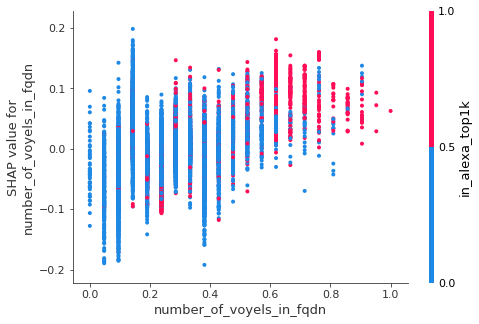

In [37]:
shap.dependence_plot("number_of_voyels_in_fqdn", shap_values, X)